In [1]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Clean Data


In [4]:
df.info()
df.isnull().sum()
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


EDA (Visualization)

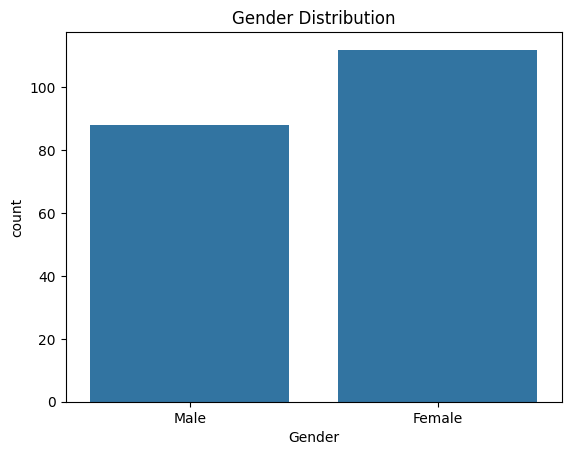

In [5]:
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()


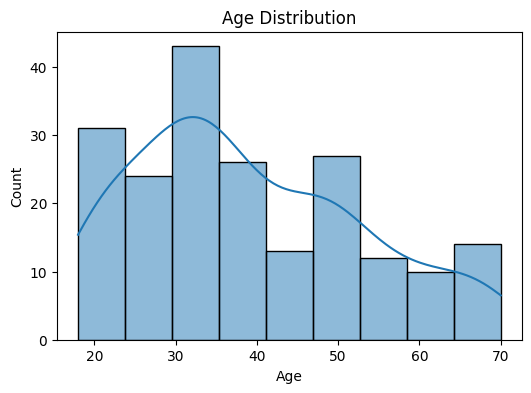

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


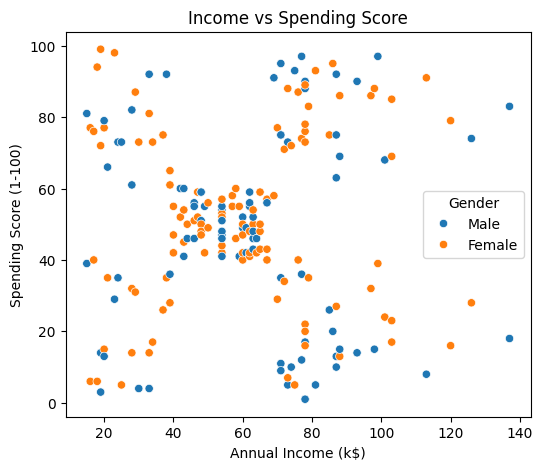

In [7]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title("Income vs Spending Score")
plt.show()


Feature Selection

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


Scaling Data

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Elbow Method

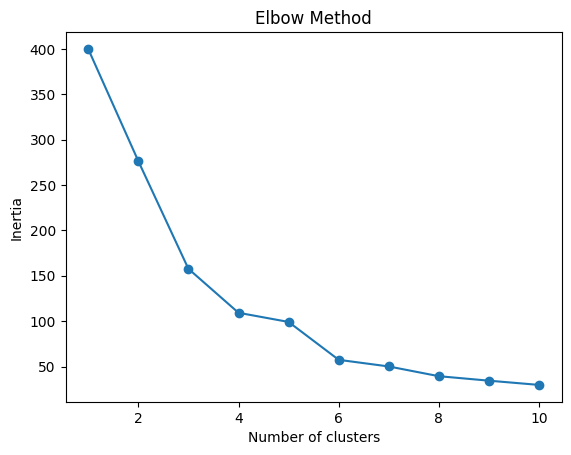

In [10]:
inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


Apply K-Means Clustering

In [11]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


Cluster Visualization


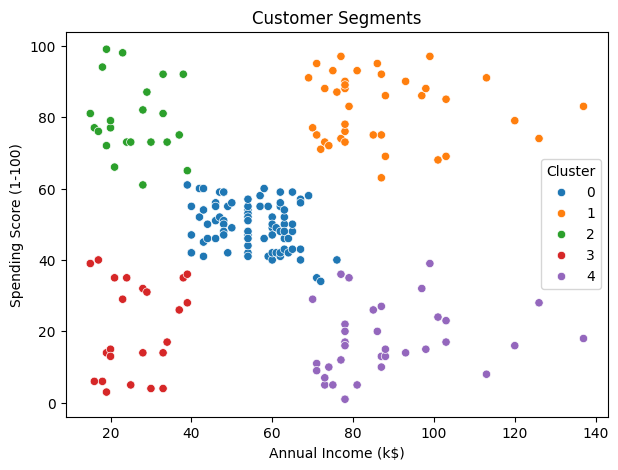

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='tab10')
plt.title("Customer Segments")
plt.show()


Cluster Summary

In [14]:
df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286
